In [1]:
#Importing the required libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

### Importing the data and getting its overview

In [2]:
# Importing the data 
df=pd.read_csv('book1-100k.csv',on_bad_lines='skip')

In [3]:
#Overview of a Dataframe
df.head()   

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

### Data Preprocessing
- Cleaning and transforming the data so that it won't affect our functionality of our code and will make visualizations easy to understand.

In [4]:
#looking for null values

df.isna().sum()

Id                     0
Name                   0
RatingDist1            0
pagesNumber            0
RatingDist4            0
RatingDistTotal        0
PublishMonth           0
PublishDay             0
Publisher            494
CountsOfReview         0
PublishYear            0
Language           37998
Authors                0
Rating                 0
RatingDist2            0
RatingDist5            0
ISBN                 546
RatingDist3            0
dtype: int64

In [5]:
#df=pd.read_csv('book1-100k.csv',on_bad_lines='skip')


df=df.dropna().drop_duplicates()  #Dropping the NA type(e.g, 'NaN','Null') values.

#renaming the columns for better understanding.
df.rename(columns={'Name':'Book','PublishDay':'PublishMonth','PublishMonth':'PublishDay','pagesNumber':'NumOfPages','Rating':
                   'AvgRating'},inplace=True)

#Extracting only necessary columns through dataset
df=df[['Book','Authors','Publisher','PublishDay','PublishMonth','PublishYear','Language','NumOfPages','AvgRating','RatingDist1',
       'RatingDist2','RatingDist3','RatingDist4','RatingDist5','RatingDistTotal','CountsOfReview']]


#Stripping and Replacing the speacial characters so that there won't be any errors and missing data.

df=df.applymap(lambda x: x.title().strip().replace('.','') if type(x)==str else x )

df['RatingDist1']=df['RatingDist1'].apply(lambda x:x.replace('1:','')).astype('Int64')
df['RatingDist2']=df['RatingDist2'].apply(lambda x:x.replace('2:','')).astype('Int64')
df['RatingDist3']=df['RatingDist3'].apply(lambda x:x.replace('3:','')).astype('Int64')
df['RatingDist4']=df['RatingDist4'].apply(lambda x:x.replace('4:','')).astype('Int64')
df['RatingDist5']=df['RatingDist5'].apply(lambda x:x.replace('5:','')).astype('Int64')
df['RatingDistTotal']=df['RatingDistTotal'].apply(lambda x:x.replace('Total:','')).astype('Int64')

df['NumOfPages']=df['NumOfPages'].astype('Int64')
df['AvgRating']=df['AvgRating'].round(decimals=2)

df[['PublishDay','PublishMonth','PublishYear']]=df[['PublishDay','PublishMonth','PublishYear']].astype('str')

#dropping or removing the outliers and improper data.
df=df.drop(df.loc[(df['PublishYear']<'1800')|(df['PublishYear']>'2022')].index)


In [6]:
color='viridis'
colorr=color+"_r"

In [7]:
palette = sns.color_palette(colorr,as_cmap=True)

#Getting the overview of the transformed data.
df.head(5).style.background_gradient(cmap=palette,high=1,low=1.6)


,Book,Authors,Publisher,PublishDay,PublishMonth,PublishYear,Language,NumOfPages,AvgRating,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,CountsOfReview
1,"Harry Potter And The Order Of The Phoenix (Harry Potter, #5)",JK Rowling,Scholastic Inc,1,9,2004,Eng,870,4.500000,12455,37005,211781,604283,1493113,2358637,29770
3,"Harry Potter And The Chamber Of Secrets (Harry Potter, #2)",JK Rowling,Scholastic,1,11,2003,Eng,352,4.420000,11896,49353,288821,706082,1504505,2560657,244
4,"Harry Potter And The Prisoner Of Azkaban (Harry Potter, #3)",JK Rowling,Scholastic Inc,1,5,2004,Eng,435,4.570000,10128,24849,194848,630534,1749958,2610317,37093
6,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",JK Rowling,Scholastic,13,9,2004,Eng,2690,4.780000,402,283,1201,4650,37432,43968,166
7,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis And Speculation",W Frederick Zimmerman,Nimble Books,26,4,2005,En-Us,152,3.790000,0,5,6,7,10,28,1


In [8]:
df.describe() #Description of our dataset

,NumOfPages,AvgRating,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,CountsOfReview
count,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,1.975500e+04,1.975500e+04,1.975500e+04,19755.000000
mean,329.004505,3.925079,827.371855,1782.657555,6531.943103,1.180266e+04,1.629995e+04,3.724458e+04,364.179701
std,229.933921,0.379201,6616.111256,10429.327368,32827.888116,6.355303e+04,1.255407e+05,2.278659e+05,1926.458602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,195.000000,3.770000,4.000000,13.000000,60.000000,9.300000e+01,8.400000e+01,2.720000e+02,7.000000
50%,293.000000,3.960000,24.000000,83.000000,378.000000,5.830000e+02,5.450000e+02,1.703000e+03,37.000000
75%,400.000000,4.130000,137.000000,447.000000,1946.500000,3.274000e+03,3.216000e+03,9.342000e+03,169.000000
max,6576.000000,5.000000,531054.000000,520599.000000,961688.000000,1.520706e+06,4.292138e+06,6.622480e+06,94850.000000


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

### Barcharts 
Barcharts represent the values of the categorical variables as bars(greater the height, Higher the value).

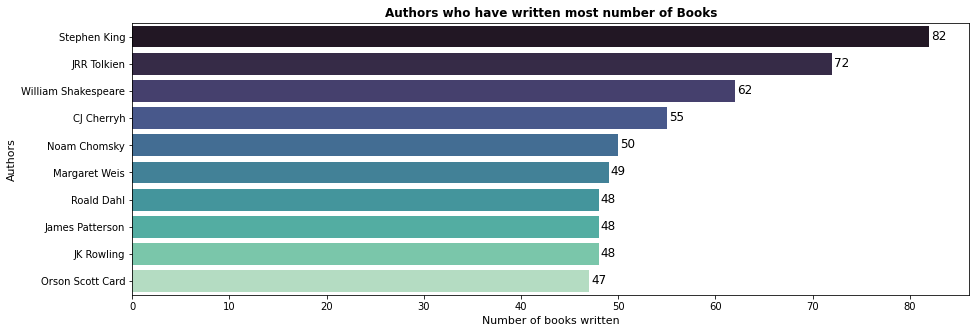

,Authors,BooksCount
1,Stephen King,82
2,JRR Tolkien,72
3,William Shakespeare,62
4,CJ Cherryh,55
5,Noam Chomsky,50
6,Margaret Weis,49
7,Roald Dahl,48
8,James Patterson,48
9,JK Rowling,48
10,Orson Scott Card,47


In [9]:
colorpad='mako'

plt.figure(figsize=(15,5))
BookCount1=df['Authors'].value_counts()[:10]
Author=BookCount1.index 

palette = sns.color_palette(colorpad,10)
plot=sns.barplot(BookCount1,Author,palette=palette)

for index , bar in enumerate(plot.patches):                #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.2, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 12)

plt.title('Authors who have written most number of Books',fontweight='bold')
plt.ylabel('Authors',fontsize=11)
plt.xlabel('Number of books written',fontsize=11)
plt.show()


df2=pd.DataFrame({'Authors':Author,'BooksCount':BookCount1.values},index=[pd.Index(range(1,11))])
df2.style.background_gradient(cmap=sns.color_palette('viridis_r',as_cmap=True),high=1,low=1.6)

# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot

* **Stephen King** has written around	**82 books**, which is the **highest in all of the authors.**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

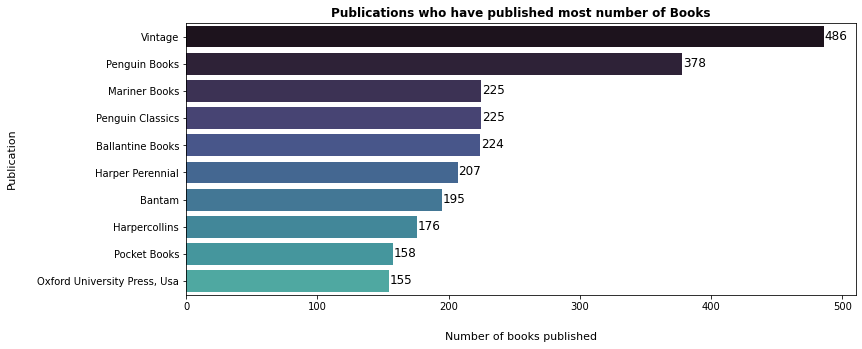

,Publisher,BooksCount
1,Vintage,486
2,Penguin Books,378
3,Mariner Books,225
4,Penguin Classics,225
5,Ballantine Books,224
6,Harper Perennial,207
7,Bantam,195
8,Harpercollins,176
9,Pocket Books,158
10,"Oxford University Press, Usa",155


In [10]:
plt.figure(figsize=(12,5))
BookCount2=df['Publisher'].value_counts()[:10]
Publisher=BookCount2.index 

palette = sns.color_palette(colorpad,13)
plot=sns.barplot(BookCount2,Publisher,palette=palette)

for index , bar in enumerate(plot.patches):      #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.50, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 12)


plt.title('Publications who have published most number of Books',fontweight='bold')
plt.xlabel('Number of books published',labelpad=20,fontsize=11)
plt.ylabel('Publication',fontsize=11,labelpad=20)
plt.show()

df3=pd.DataFrame({'Publisher':BookCount2.index,'BooksCount':BookCount2.values},index=[pd.Index(range(1,11))])
df3.style.background_gradient(cmap=sns.color_palette('viridis_r',as_cmap=True),high=1,low=1.6)


* **Vintage Publication** has published around **486 books**, which is the **more than that of all of the other Publications.**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


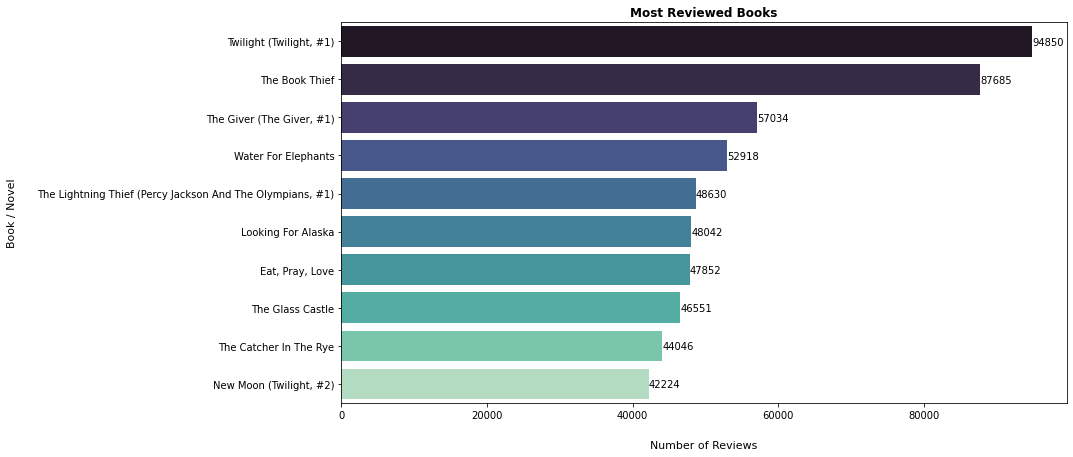

,Book,CountsOfReview
1,"Twilight (Twilight, #1)",94850
2,The Book Thief,87685
3,"The Giver (The Giver, #1)",57034
4,Water For Elephants,52918
5,"The Lightning Thief (Percy Jackson And The Olympians, #1)",48630
6,Looking For Alaska,48042
7,"Eat, Pray, Love",47852
8,The Glass Castle,46551
9,The Catcher In The Rye,44046
10,"New Moon (Twilight, #2)",42224


In [11]:
plt.figure(figsize=(13,7))

MostReviewed=df[['Book','CountsOfReview']].sort_values(by='CountsOfReview',ascending=False)[:10]
Book=MostReviewed['Book']
ReviewCount=MostReviewed['CountsOfReview']

palette = sns.color_palette(colorpad,10)
plot=sns.barplot(ReviewCount,Book,palette=palette)

for index , bar in enumerate(plot.patches):       #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.9, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 10)

plt.title('Most Reviewed Books',fontweight='bold')
plt.xlabel('Number of Reviews',labelpad=20,fontsize=11)
plt.ylabel('Book / Novel',labelpad=20,fontsize=11)
plt.show()

MostReviewed.set_index([pd.Index(range(1,11))]).style.background_gradient(cmap=sns.color_palette('viridis_r',
                                                                                                as_cmap=True),high=1,low=1.6)

* **Twilight (Twilight, #1)**	is **most reviewed Novel** with around **94,850 rewiews.**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


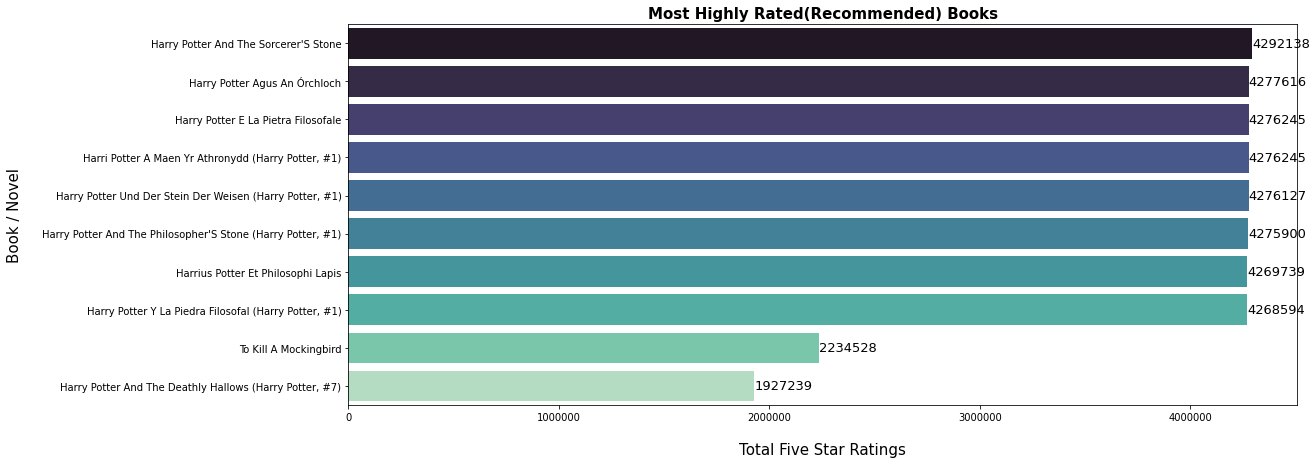

,Book,RatingDist5
1,Harry Potter And The Sorcerer'S Stone,4292138
2,Harry Potter Agus An Órchloch,4277616
3,Harry Potter E La Pietra Filosofale,4276245
4,"Harri Potter A Maen Yr Athronydd (Harry Potter, #1)",4276245
5,"Harry Potter Und Der Stein Der Weisen (Harry Potter, #1)",4276127
6,"Harry Potter And The Philosopher'S Stone (Harry Potter, #1)",4275900
7,Harrius Potter Et Philosophi Lapis,4269739
8,"Harry Potter Y La Piedra Filosofal (Harry Potter, #1)",4268594
9,To Kill A Mockingbird,2234528
10,"Harry Potter And The Deathly Hallows (Harry Potter, #7)",1927239


In [12]:
plt.figure(figsize=(17,7))

MostRated=df[['Book','RatingDist5']].sort_values(by='RatingDist5',ascending=False)[:10]
y=MostRated['Book']
x=MostRated['RatingDist5']

palette = sns.color_palette(colorpad,10)
plot=sns.barplot(x,y,palette=palette)

for index , bar in enumerate(plot.patches):     #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.9, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 13)

plt.title('Most Highly Rated(Recommended) Books',fontweight='bold',fontsize=15)
plt.xlabel('Total Five Star Ratings',labelpad=20,fontsize=15)
plt.ylabel('Book / Novel',labelpad=20,fontsize=15)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

MostRated.set_index([pd.Index(range(1,11))]).style.background_gradient(cmap=sns.color_palette('mako_r',
                                                                                                as_cmap=True),low=0.6,high=2)

* **Harry Potter And The Sorcerer's Stone** is the **most highly(5/5) rated Novel**, which has around	**42,92,138 five-star ratings.**       
* It can also be observed that **the Highest-Rated Novels** are of **the Harry Potter series**, which indicates that the series is **highly popular !!**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;



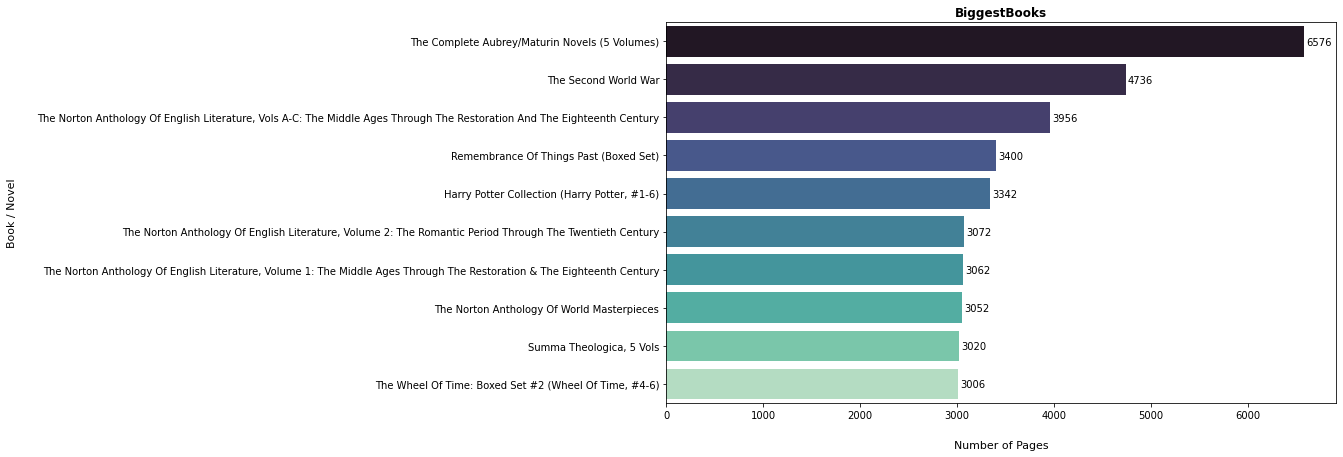

,Book,NumOfPages
1,The Complete Aubrey/Maturin Novels (5 Volumes),6576
2,The Second World War,4736
3,"The Norton Anthology Of English Literature, Vols A-C: The Middle Ages Through The Restoration And The Eighteenth Century",3956
4,Remembrance Of Things Past (Boxed Set),3400
5,"Harry Potter Collection (Harry Potter, #1-6)",3342
6,"The Norton Anthology Of English Literature, Volume 2: The Romantic Period Through The Twentieth Century",3072
7,"The Norton Anthology Of English Literature, Volume 1: The Middle Ages Through The Restoration & The Eighteenth Century",3062
8,The Norton Anthology Of World Masterpieces,3052
9,"Summa Theologica, 5 Vols",3020
10,"The Wheel Of Time: Boxed Set #2 (Wheel Of Time, #4-6)",3006


In [13]:

BiggestBook=df[['Book','NumOfPages']].sort_values(by='NumOfPages',ascending=False)[:10]


plt.figure(figsize=(12,7))

x=BiggestBook['NumOfPages']
y=BiggestBook['Book']

palette = sns.color_palette(colorpad,10)
plot=sns.barplot(x,y,palette=palette)

for index , bar in enumerate(plot.patches):             #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+20, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 10)

plt.title('BiggestBooks',fontweight='bold')
plt.xlabel('Number of Pages',labelpad=20,fontsize=11)
plt.ylabel('Book / Novel',labelpad=20,fontsize=11)
plt.show()


BiggestBook.set_index([pd.Index(range(1,11))]).style.background_gradient(cmap=sns.color_palette('viridis_r',
                                                                                            as_cmap=True),high=1,low=1.6)

* The largest book **The Complete Aubrey/Maturin Novels (5 Volumes)** is about **6576 pages** long, which is **Huge!!**
&nbsp;</n> &nbsp;</n>&nbsp;</n>&nbsp;</n>&nbsp;</n>

&nbsp;</n> &nbsp;</n>&nbsp;</n>&nbsp;</n>&nbsp;</n>

&nbsp;</n> &nbsp;</n>&nbsp;</n>&nbsp;</n>&nbsp;</n>




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

**A**s there is no measure or variable of popularity in our data, we will try creating one**. Although it won't be extremly accurate but it will still help us draw some analysis through it.
So as generally if we want to look for a popular author or publication we generally prefer to see How many positive reviews the book has and how many reviews it has.
Thus so in our dataframe df the variables for positive ratings are RatingDist4, RatingDist5 and the variable for number of reviews is CountsOfReview.                                                 
                                                                                              
For "Most Popular Authors" plot,                                                                             
We will sum those variables and later after getting all the values of the author, we will calculate it's mean such that it won't be affected by outliers.                                               


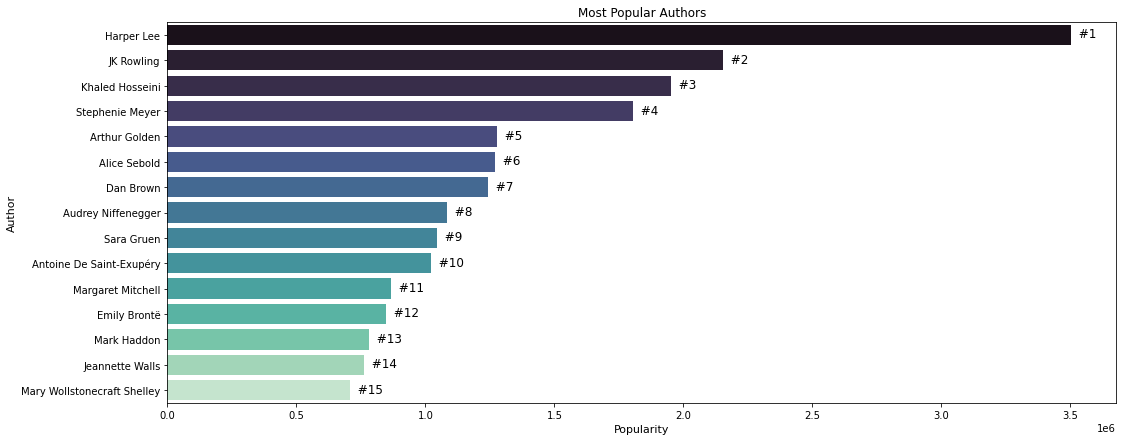

In [14]:
plt.figure(figsize=(17,7))

plt5=df[['Authors','CountsOfReview','RatingDist4','RatingDist5']].groupby(df['Authors'],sort=False).median()
plt5['popularity']=plt5['RatingDist5']+plt5['RatingDist4']+plt5['CountsOfReview']

plt5.sort_values(by='popularity',ascending=False,inplace=True)

popularity=list(plt5.popularity.values)[:15]
Authors=plt5.index[:15]

palette = sns.color_palette(colorpad,15)
plot=sns.barplot(popularity,Authors,palette=palette)

num=0

for index , bar in enumerate(plot.patches):                #Adding Patches into the plot
    height = bar.get_height()
    num+=1
    plot.text(bar.get_width(), bar.get_y()+0.5, "  #"+str(num), fontsize = 12)
plt.title('Most Popular Authors')
plt.ylabel('Author',fontsize=11)
plt.xlabel('Popularity',fontsize=11)
plt.show()

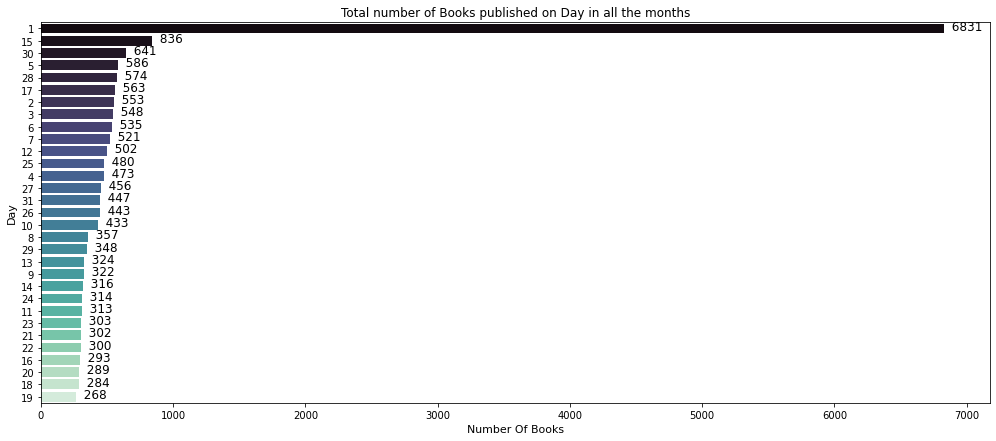

In [15]:
plt.figure(figsize=(17,7))

Day_Month=df['PublishDay'].value_counts().index
Count=df['PublishDay'].value_counts().values

palette = sns.color_palette(colorpad,31)
plot=sns.barplot(Count,Day_Month,palette=palette)

for index , bar in enumerate(plot.patches):                #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width(), bar.get_y()+0.5, "  "+str(round(bar.get_width())), fontsize = 12)
plt.title('Total number of Books published on Day in all the months')
plt.ylabel('Day',fontsize=11)
plt.xlabel('Number Of Books',fontsize=11)
plt.show()

In [16]:
total=df['PublishDay'].value_counts().sum()
one=(6831/total)*100
nineteen=(268/total)*100
print(one,nineteen)

34.57858769931663 1.3566185775752975


We can observe that **most of the books are published on 1st day of the month with is 34.5% probability.**
Wheras,**19 is the choosen day with just 1.3% probabilty.**                                                                                                 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


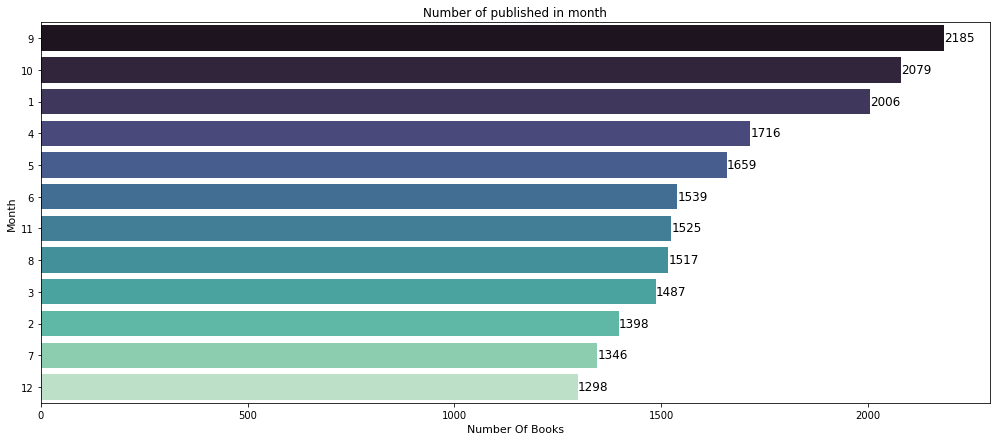

In [17]:
plt.figure(figsize=(17,7))

Day_Month=df['PublishMonth'].value_counts().index
Count=df['PublishMonth'].value_counts().values

palette = sns.color_palette(colorpad,12)
plot=sns.barplot(Count,Day_Month,palette=palette)

for index , bar in enumerate(plot.patches):                #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.2, bar.get_y()+0.5, str(round(bar.get_width())), fontsize = 12)
    
plt.title('Number of published in month')
plt.ylabel('Month',fontsize=11)
plt.xlabel('Number Of Books',fontsize=11)
plt.show()

In [18]:
total=df['PublishMonth'].value_counts().sum()
nine=(2185/total)*100
twelve=(1298/total)*100
print(one,twelve)

34.57858769931663 6.570488483928119


                   
We can observe that **most of the books are published in January with is 34.5% probability.**
Wheras, **December is the least chosen month with just 6% probabilty.**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


In [19]:
df['day-month']=df['PublishDay']+' / '+df['PublishMonth']

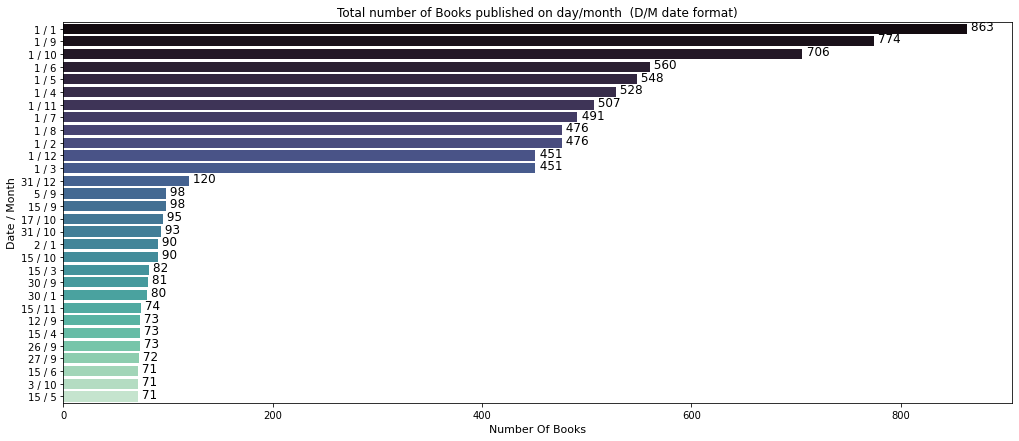

In [20]:
plt.figure(figsize=(17,7))

Day_Month=df['day-month'].value_counts().index[:30]
Count=df['day-month'].value_counts().values[:30]

palette = sns.color_palette(colorpad,31)
plot=sns.barplot(Count,Day_Month,palette=palette)

for index , bar in enumerate(plot.patches):                #Adding Patches into the plot
    height = bar.get_height()
    plot.text(bar.get_width()+.2, bar.get_y()+0.5, " "+str(round(bar.get_width())), fontsize = 12)
plt.title('Total number of Books published on day/month  (D/M date format)')
plt.ylabel('Date / Month',fontsize=11)
plt.xlabel('Number Of Books',fontsize=11)
plt.show()

We can clearly observe **highest number of books** get published in **the month of January**, Particularly on **1st January**.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [21]:
Books=df['Book'].groupby(df['PublishYear']).agg('count')
Year=Books.index.astype('int')[20:100]
BookCount=Books.values.astype('int')[20:100]

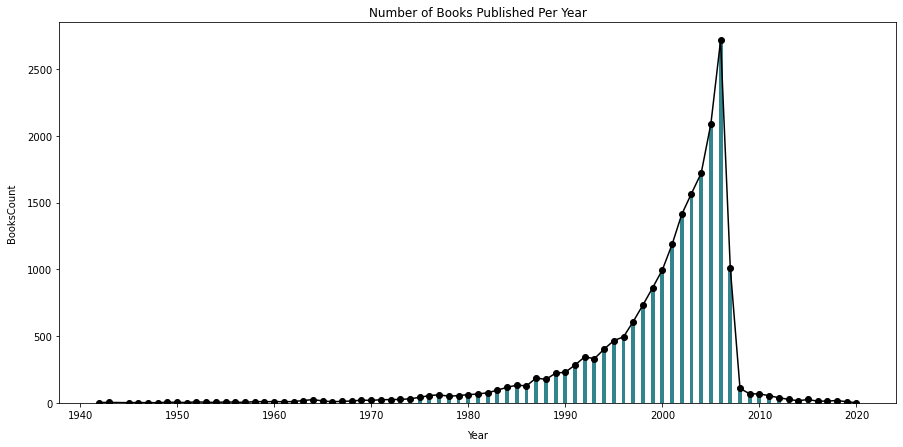

,Year,BooksCount
1,2006,2715
2,2005,2090
3,2004,1720
4,2003,1568
5,2002,1412
6,2001,1186
7,2007,1009
8,2000,996
9,1999,862
10,1998,733


In [22]:
plt.figure(figsize=(15,7))

ax2=plt.bar(x=Year,height=BookCount,width=0.4,color=sns.color_palette('crest',1))#'crest'
#plt.xticks([Year][::5])
y2=[i+3 for i in BookCount]

plt.plot(Year,BookCount,color='black')#darkslategrey
plt.scatter(Year,BookCount,color='black')#1f6357


plt.title('Number of Books Published Per Year')
plt.xlabel('Year',labelpad=10)
plt.ylabel('BooksCount',labelpad=10)
plt.show()

df4=pd.DataFrame({'Year':Books.index,'BooksCount':Books.values},index=range(1,len(Books.values)+1))
df4=df4.sort_values(by='BooksCount',ascending=False)[:10]
df4=df4.set_index([pd.Index(range(1,11))])
df4.style.background_gradient(cmap=sns.color_palette('viridis_r',as_cmap=True),high=1,low=1.6)

* We can observe that after 1980 the number of books started being published at an **nearly exponetial rate**.
 -  Factors can include increase in the data and information due to birth of the Internet.                   

* Over the Years the publishing of the books have increased Drastically.
      
https://www.google.com/search?q=era+of+the+internet&rlz=1C1RXQR_enIN1013IN1013&oq=era+of+the+inter&aqs=chrome.0.0i512j69i57j0i22i30i625j0i15i22i30j0i22i30j0i15i22i30l2j0i22i30i625l3.5873j0j7&sourceid=chrome&ie=UTF-8 
      
  
        
(_The factorial drop after 2006 may be due to missing data, Hence the current plot can be applicable only upto the Year of 2006._)                            
   https://www.researchgate.net/figure/The-publishing-years-of-the-most-read-books-of-2019-There-was-a-total-of-189-distinct_fig4_345388595    
   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [23]:
q=pd.DataFrame()
q['Rating']= df['AvgRating'].apply(lambda x: int(round(x)) if type(x)==float else x)
q['ReviewCount']=df['CountsOfReview']
q=q['ReviewCount'].groupby(q['Rating']).agg('count')

x=q.index
y=q.values

palette = sns.color_palette('crest',1)

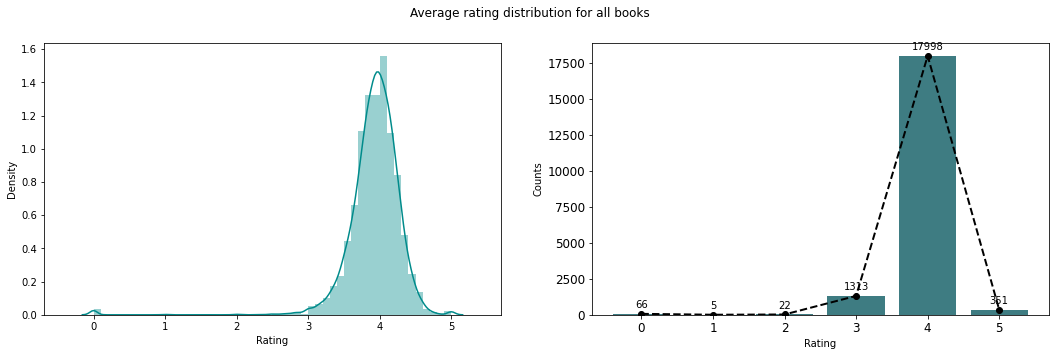

In [24]:
figure, (ax1,ax2) = plt.subplots(1, 2, sharex=True ,figsize=(18,5))     #Plotting subplots
figure.suptitle('Average rating distribution for all books')


#Axis1: Distribution Plot

sns.distplot(ax=ax1,color='darkcyan',x=df['AvgRating'],kde=True).set_xlabel('Rating')


#Axis2: Bar Plot in addition with small details
b=sns.barplot(ax=ax2,x=q.index,y=q.values,palette=palette)
for g in b.patches:
    b.annotate(format(int(g.get_height())),
                   (g.get_x() + g.get_width() / 2., g.get_height()),     #Adding Patches into the plot
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')


ax2.plot(x,y,color='black',linewidth =2,linestyle ='dashed' )
ax2.scatter(x,y,color='black',linewidths = 1)
ax2.ticklabel_format(style='plain', axis='y')

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel('Rating')
plt.ylabel('Counts')


plt.show()

**Most of the ratings** are concentrated on **4 or ratings close to it**                   
- Reasons can include the factors such as people often tend to buy the books which are often recommended by someone else or they often tend to buy the most popular ones.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


					Top 5 most used laguages in the books


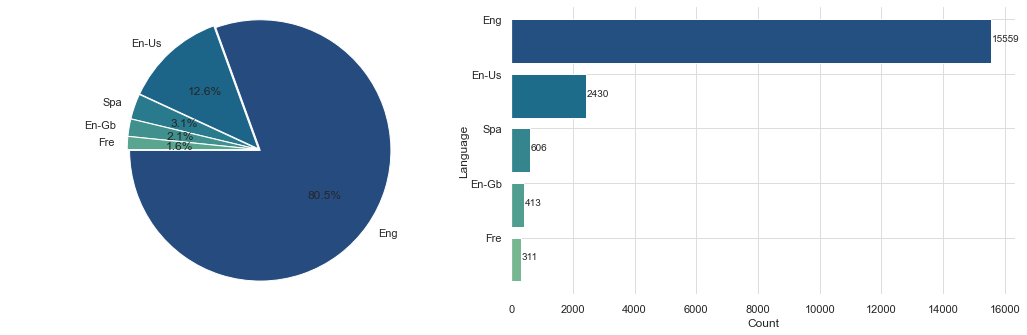

In [25]:

print('\033[1m' +'\t\t\t\t\tTop 5 most used laguages in the books')

fig = plt.figure(figsize=(7,4))
sns.set_theme(palette='crest_r')

ax1 = fig.add_axes(rect=[0,0,1,1])
ax2 = fig.add_axes(rect=[1,0,1,1])

x=df['Language'].value_counts(dropna=True)[:5]
x2=df['Language'].value_counts(dropna=True)[:10]
y=x.index

sep = (0.01, 0.01, 0.01, 0.01,0.01) 

ax1.pie(x, explode=sep, labels=y, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')

plt.barh(y,x,color=sns.color_palette('crest_r',5),align='edge')
plt.xlabel('Count')
plt.ylabel('Language',labelpad=0.3)
plt.grid(color='#DDDDDD')
ax2.set_facecolor("White")
ax2.invert_yaxis()

for index , bar in enumerate(ax2.patches):
    height = bar.get_height()
    ax2.text(bar.get_width()+30, bar.get_y()+0.4, str(round(bar.get_width())), fontsize = 10)
plt.show()



# df3=pd.DataFrame({'Language':x2.index,'BooksCount':x2.values},index=[pd.Index(range(1,11))])
# df3.style.background_gradient(cmap=sns.color_palette('viridis_r',as_cmap=True),high=1,low=1.6)

* More than **80 to 95 %** of the Books are **written in English**.
___



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;



### Correlation Heatmap

Correlation heatmap shows us how much each feature is correlated with other.
The values range between -1 to 1:                                                                
Where,                                                     
- -1 implies inverse/negative correlation : Values of one feature are moving inverse to that of the other feature.
- 0 implies no correlation : Values aren't correlated (Scattered)
- 1 implies positive correlation : Values are nearly aligned with each other.

(The colors get darker with higher correlation)

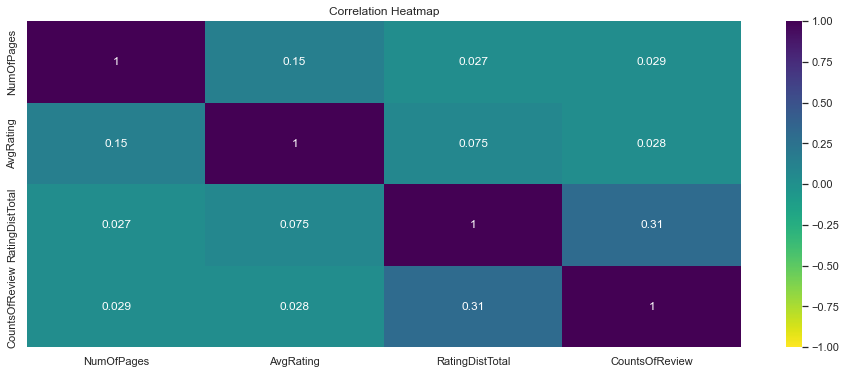

In [26]:
palette = sns.color_palette(colorr,as_cmap=True)


df1=df[['NumOfPages','AvgRating',
       'RatingDistTotal','CountsOfReview']]

plt.figure(figsize=(16, 6))
sns.heatmap(data=df1.corr(), vmin=-1, vmax=1, annot=True,cmap=palette)
plt.title('Correlation Heatmap',fontsize=12)
plt.show()

* _Although **nearly all of the variables are showing weak positive correlation, the correlation between variable "RatingDistTotal"  and "CountsOfReviews" is enough to draw conclusions on(although not robust).**_

- _To make sure that our Heatmap is showing proper values we will also plot the plot on variables with least correlation too i.e,NumOfPages and AvgRating._

In [27]:
plt.style.use('seaborn-white')

In [28]:
df2=df[['Book','AvgRating','CountsOfReview','NumOfPages','RatingDistTotal']][(df['NumOfPages']<5000)&
                                    (df['NumOfPages']>10)&(df['CountsOfReview']<6000)&(df['RatingDistTotal']<5000)]

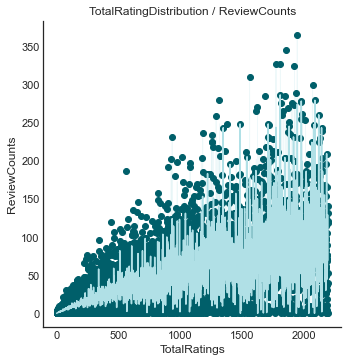

In [29]:
upperlimit=df2['RatingDistTotal'].mean()*2
lowerlimit=df2['RatingDistTotal'].mean()/2
plt1=df2[(df2['RatingDistTotal']<upperlimit)] 

sns.relplot(data=plt1,x='RatingDistTotal',y='CountsOfReview',kind='line',color='powderblue')
plt.scatter(data=plt1,x='RatingDistTotal',y='CountsOfReview',color='#005f6a')


plt.title('TotalRatingDistribution / ReviewCounts')
plt.xlabel('TotalRatings')
plt.ylabel('ReviewCounts')

plt.show()

- As mean is prone to outliers we will use median instead.

In [30]:
upperlimit=df2['RatingDistTotal'].median()*2

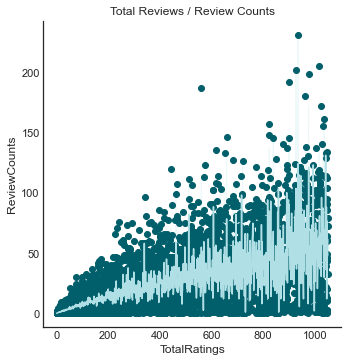

In [31]:
plt1=df2[df2['RatingDistTotal']<upperlimit] 

sns.relplot(data=plt1,x='RatingDistTotal',y='CountsOfReview',kind='line',color='powderblue')
plt.scatter(data=plt1,x='RatingDistTotal',y='CountsOfReview',color='#005f6a')

plt.title('Total Reviews / Review Counts')
plt.xlabel('TotalRatings')
plt.ylabel('ReviewCounts')

plt.show()

**The positive linear relation can be observed.**
- **_Which implies if the book is Highly rated, it's a possibility that the book is Higly reviewed too._**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

In [32]:
upperlimit=df2['NumOfPages'].median()*2
upperlimit

564.0

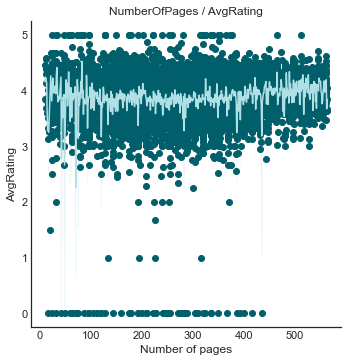

In [33]:
plt2=df2[['Book','AvgRating','NumOfPages']][(df2['NumOfPages']<upperlimit)]
sns.relplot(data=plt2,x='NumOfPages',y='AvgRating',kind='line',color='powderblue')
plt.scatter(data=plt2,x='NumOfPages',y='AvgRating',color='#005f6a')

plt.title('NumberOfPages / AvgRating')
plt.xlabel('Number of pages')
plt.ylabel('AvgRating')
plt.show()

As of our previous observations, Points are compact more on ratings close to 4 So we need to reduce the points to get Even more clearer results.
To reduce the points we can reduce the points of either too small books or too large books.
We will consider size of the books with the help of average number of pages in books ,i.e mean of pages.

So **there are 293 pages in a book at an approximate average(.median())**. With that we can consider a **small book can be of 20-30 pages** and a **large book can be of 550-600 pages.**

The average can be calculated with the help of mean, median or mode.
Since, Mean can be easily affected by outlier we can either choose median or mode, we will choose Median 
Pandas function to calculate the median is pandas.DataFrame.median()
In our case **pd.df['NumberOfPages'].median() has given us the value of 293.**

So now **we will only include the values of df['NumOfPages'] which are greater than 100(slightly lesser than median/2) and lesser than 600(slighly greater than median*2)**.

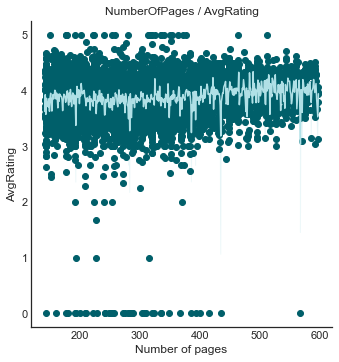

In [34]:
plt2=df2[['Book','AvgRating','NumOfPages']][(df2['NumOfPages']<600)&(df2['NumOfPages']>140)]
sns.relplot(data=plt2,x='NumOfPages',y='AvgRating',kind='line',color='powderblue')
plt.scatter(data=plt2,x='NumOfPages',y='AvgRating',color='#005f6a')

plt.title('NumberOfPages / AvgRating')
plt.xlabel('Ratings')
plt.xlabel('Number of pages')
plt.ylabel('AvgRating')
plt.show()

Even after cleaning out the plot the relation between variables can not visible.                      
Thus we can conclude **number of pages doesn't have much relation with Average Ratings**, which means values of Heatmap are accurate.

---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

### **Insights and Takeaways:**


- Through the plot **Top 5 most used languages in the books** we can observe **English is the most used language in the books**, which means there must be larger English Reading Audience.                                
  * So **it is a suggestion for the Author or Publication to publish a book or version of Book in English to make it reach out to larger audience.**
   
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;



- Through the plot **Average Rating Distribution of all books** we can observe that the **Rating Distribution is positively skewed(RatingDist4,RatingDist5).**                 

   - **The possible reasons can include:**
       * Majority people tend to buy popular books.
       * Ratings are manupulated.

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

- Through the plot **Published Per Year** we can observe the **publishing of the books has increased exponentially since the birth of the internet(1983).**                                 
   - **The possible reasons can include:**
       * It was pretty difficult to hold the records of published Books before Internet's birth. Internet made it preety easy to hold the records of the Books which are being published and it also affected the rise in books publishing in many ways like making books easy to access to general public.

     * Due to huge rise in information and Data.  

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

- Through the plots **'Total number of Books published on Day in all the months', 'Number of published in month' & 'Total number of Books published on day/month  (D/M date format)'** we can observe that:
  - **Out of all the days in a month, 1st day is most chosen,               
  - Out of all the months in a year, September is most chosen,                  
  - And out of all the dates in an Year 1st Jan is most chosen.**

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

- Through the plot **Total Reviews / Review Counts** we got the conclusion that, **If the book is Highly rated, that book is more likely to be Highly reviewed too.**

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;



                                                                                                                         ***